In [1]:
import pandas as pd

In [2]:
ROOT_FOLDER = '../../../'

In [3]:
DATA_FOLDER = '../../../data/'

In [4]:
large_ml_lncRNA_search_df = pd.read_parquet(f'{DATA_FOLDER}large_ml_lncRNA_search_df.parquet')

In [5]:
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.dropna()
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df.query('language == "en"')
large_ml_lncRNA_search_df = large_ml_lncRNA_search_df[['title', 'year']]

In [6]:
large_ml_lncRNA_search_df

,title,year
12,LncMachine: a machine learning algorithm for l...,2021
29,DMFLDA: a deep learning framework for predicti...,2020
48,Evaluation of deep learning in non-coding RNA ...,2019
58,A review of machine learning-based prediction ...,2023
89,LncRNA Subcellular Localization Signals–Are th...,2023
...,...,...
913,Mitochondrial Import of Malat1 Regulates Cardi...,2020
917,Impact of sequencing technologies on long non-...,2022
921,Deciphering the methylation landscape in breas...,2021
928,Machine learning models for predicting lymph n...,2020


In [7]:
meta_df = large_ml_lncRNA_search_df

In [8]:
ml_results_df = pd.read_parquet(f'{DATA_FOLDER}ml_lncRNA_search_result_df.parquet')

Plot frequency analysis

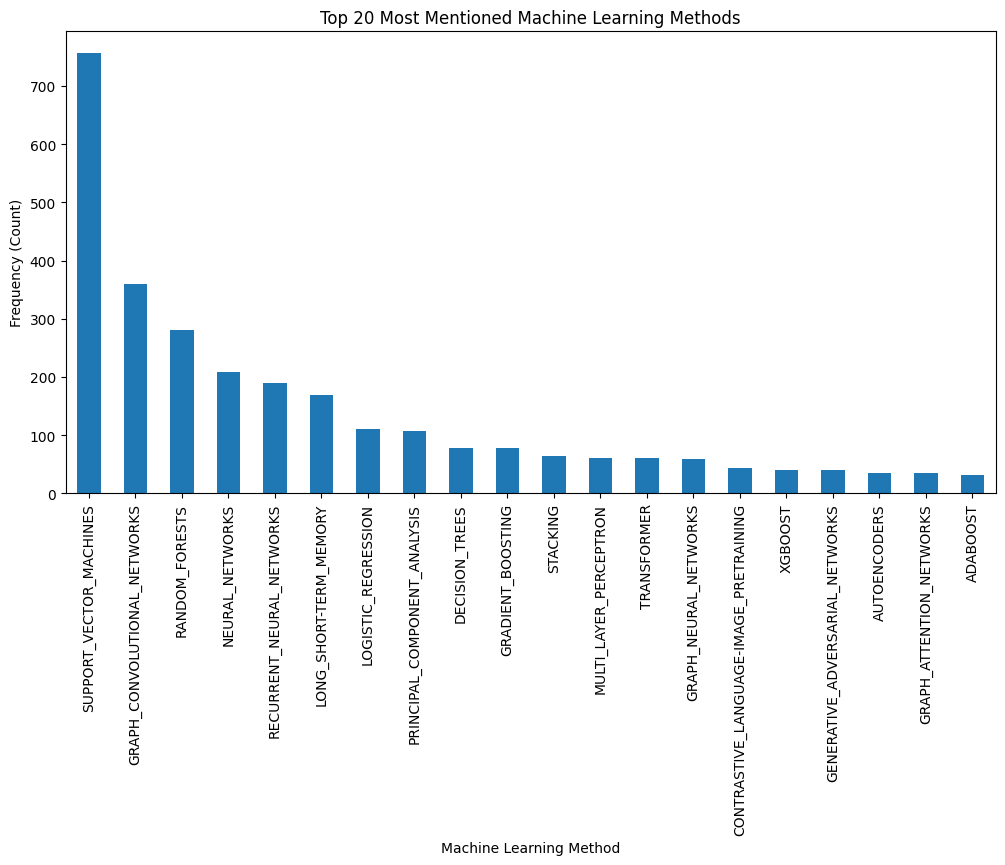

In [9]:
import matplotlib.pyplot as plt

# Aggregate the counts of ML terms
ml_term_counts = ml_results_df.groupby("ml_term")["cnt"].sum().sort_values(ascending=False)

# Plot the top ML methods
plt.figure(figsize=(12, 6))
ml_term_counts.head(20).plot(kind="bar")
plt.title("Top 20 Most Mentioned Machine Learning Methods")
plt.xlabel("Machine Learning Method")
plt.ylabel("Frequency (Count)")
plt.xticks(rotation=90)
plt.show()


Trend Analysis

<Figure size 1200x600 with 0 Axes>

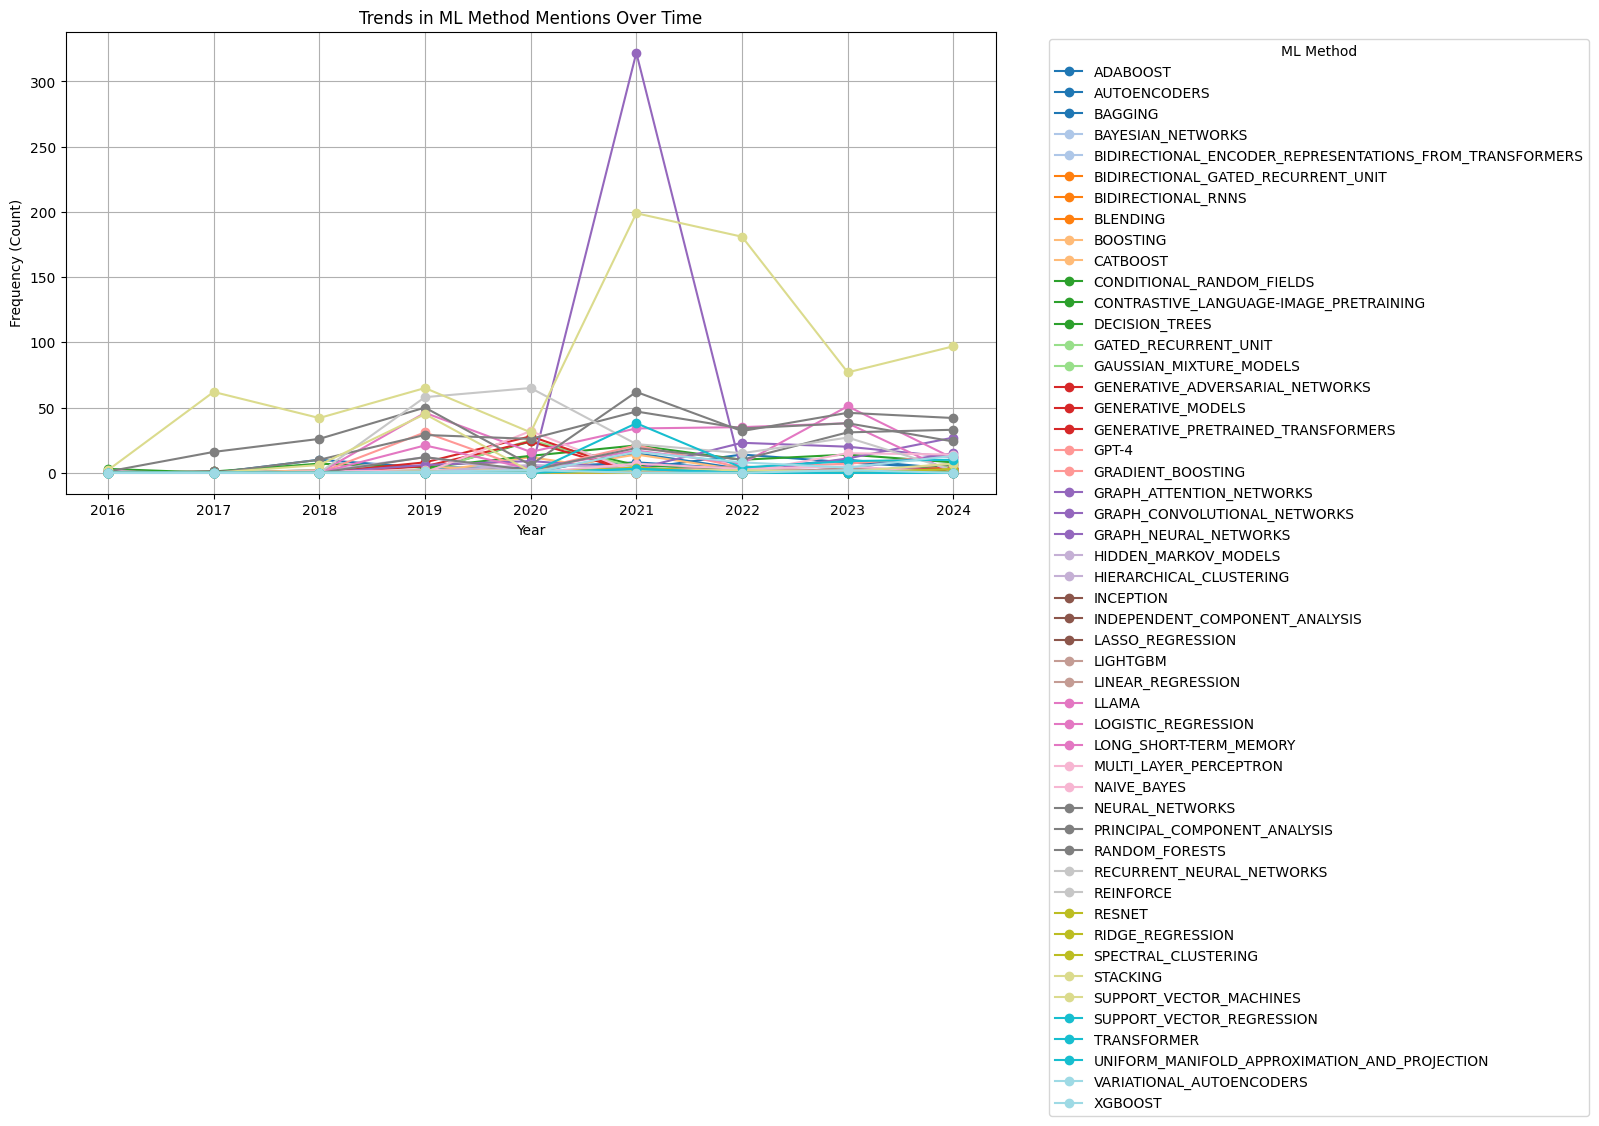

In [10]:
# Merge ML results with publication years
ml_trend_df = ml_results_df.merge(meta_df, on="title")

# Aggregate counts per year
ml_trend_over_time = ml_trend_df.groupby(["year", "ml_term"])["cnt"].sum().reset_index()

# Pivot for visualization
ml_trend_pivot = ml_trend_over_time.pivot(index="year", columns="ml_term", values="cnt").fillna(0)

# Define colormap using the correct method
num_methods = len(ml_trend_pivot.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_methods) for i in range(num_methods)]  # Generate distinct colors

# Plot time-series trends
plt.figure(figsize=(12, 6))
ml_trend_pivot.plot(kind="line", figsize=(12, 6), marker="o", color=colors)
plt.title("Trends in ML Method Mentions Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency (Count)")
plt.legend(title="ML Method", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


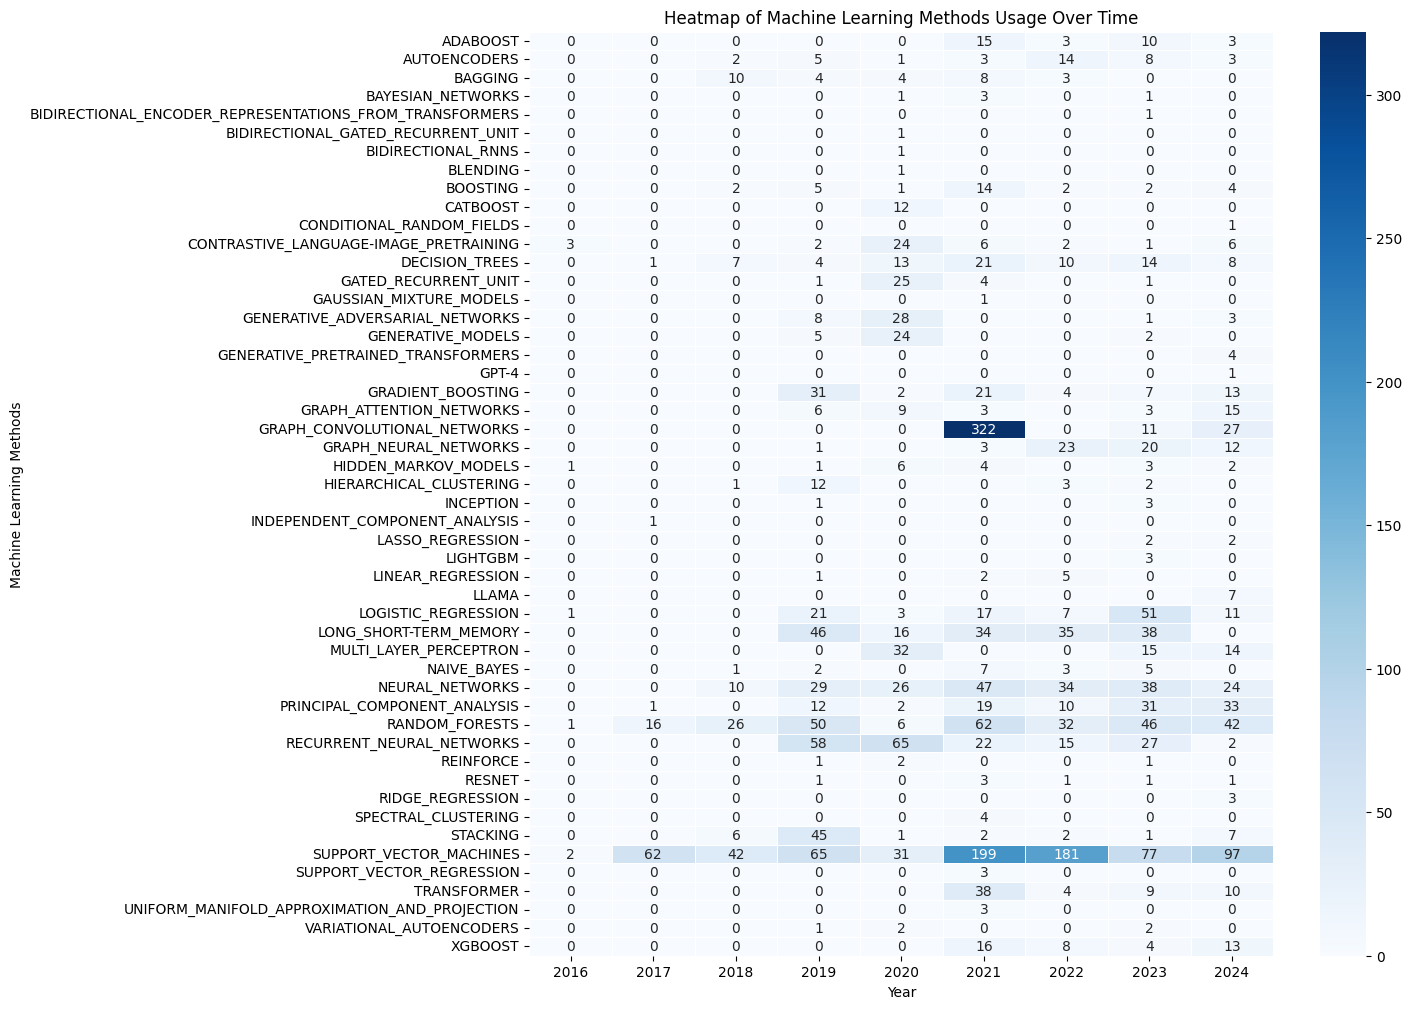

In [11]:
import seaborn as sns

# Create a heatmap for the selected ML methods
plt.figure(figsize=(12, 12))
sns.heatmap(ml_trend_pivot.T, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
#sns.heatmap(ml_trend_pivot.T, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

plt.xlabel("Year")
plt.ylabel("Machine Learning Methods")
plt.title("Heatmap of Machine Learning Methods Usage Over Time")
plt.show()


Co-occurrence Analysis – Generate a network graph to explore relationships between ML methods and research topics.

In [12]:
from collections import Counter
import numpy as np

# Group ml_terms by title
grouped_methods = ml_trend_df.groupby('title')['ml_term'].apply(list)

# Get unique ml methods
unique_methods = sorted(ml_trend_df['ml_term'].unique())

# Create an empty co-occurrence matrix
co_occurrence_matrix = pd.DataFrame(
    np.zeros((len(unique_methods), len(unique_methods)), dtype=int),
    index=unique_methods,
    columns=unique_methods
)

# Populate the matrix
for methods in grouped_methods:
    method_counts = Counter(methods)
    for method1 in method_counts:
        for method2 in method_counts:
            if method1 != method2:
                co_occurrence_matrix.loc[method1, method2] += 1

# Display the matrix to the user
# import ace_tools as tools
# tools.display_dataframe_to_user(name="ML Methods Co-Occurrence Matrix", dataframe=co_occurrence_matrix)



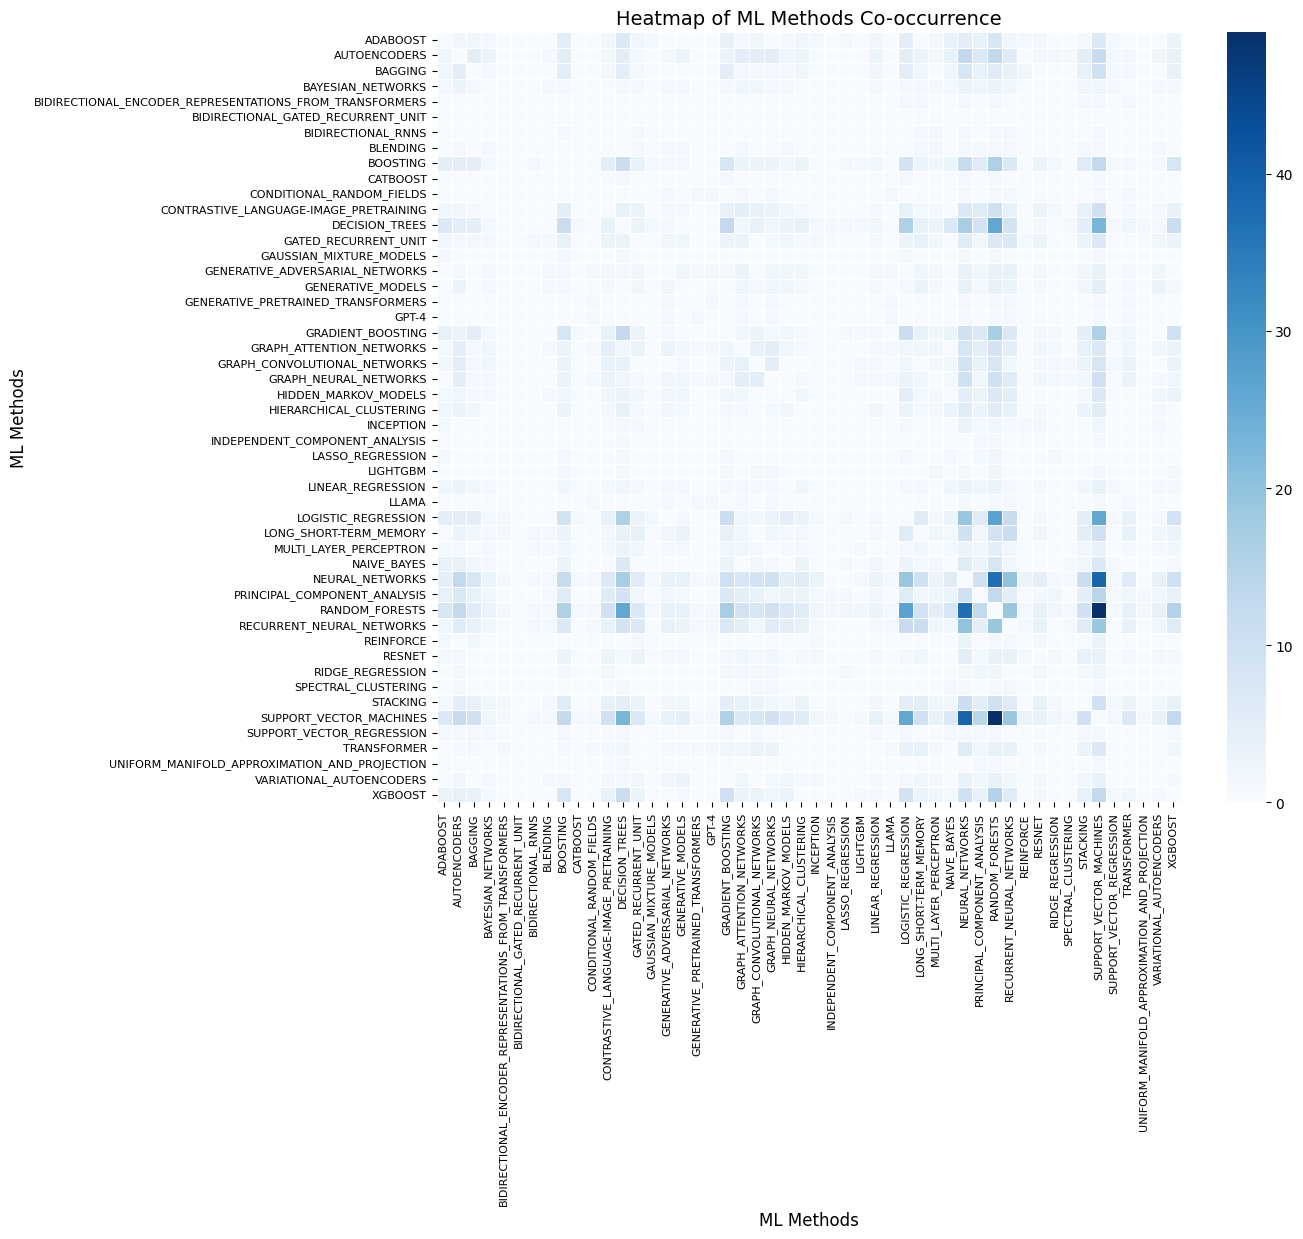

In [13]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap to visualize the co-occurrence matrix
sns.heatmap(co_occurrence_matrix, cmap="Blues", annot=False, linewidths=0.5)

# Labels and title
plt.title("Heatmap of ML Methods Co-occurrence", fontsize=14)
plt.xlabel("ML Methods", fontsize=12)
plt.ylabel("ML Methods", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()


Let's add a hierarchy to the ML-TERMS

In [14]:
model_df = pd.read_excel(f'{ROOT_FOLDER}ML-Model-Categorization.ods', sheet_name='Sheet1')

In [15]:
model_df

,Category,CAT_1,CAT_2,CAT_3,MODEL,MODEL_ACRONYM
0,Regression Models,Supervised Learning Models,Regression Models,NaN,Linear Regression,NaN
1,Regression Models,NaN,NaN,NaN,Polynomial Regression,NaN
2,Regression Models,NaN,NaN,NaN,Ridge Regression,NaN
3,Regression Models,NaN,NaN,NaN,Lasso Regression,NaN
4,Regression Models,NaN,NaN,NaN,Elastic Net Regression,NaN
...,...,...,...,...,...,...
100,Large-Scale Pretrained Models,NaN,NaN,NaN,Claude,NaN
101,Large-Scale Pretrained Models,NaN,NaN,NaN,LLaMA,NaN
102,Large-Scale Pretrained Models,NaN,Multimodal Models,NaN,Contrastive Language-Image Pretraining,CLIP
103,Large-Scale Pretrained Models,NaN,NaN,NaN,DALL-E,DALL-E


Add ML_TERM column

In [16]:
model_df['ML_TERM'] = model_df['MODEL'].apply(lambda x: x.replace(' ', '_').upper())

In [17]:
model_df

,Category,CAT_1,CAT_2,CAT_3,MODEL,MODEL_ACRONYM,ML_TERM
0,Regression Models,Supervised Learning Models,Regression Models,NaN,Linear Regression,NaN,LINEAR_REGRESSION
1,Regression Models,NaN,NaN,NaN,Polynomial Regression,NaN,POLYNOMIAL_REGRESSION
2,Regression Models,NaN,NaN,NaN,Ridge Regression,NaN,RIDGE_REGRESSION
3,Regression Models,NaN,NaN,NaN,Lasso Regression,NaN,LASSO_REGRESSION
4,Regression Models,NaN,NaN,NaN,Elastic Net Regression,NaN,ELASTIC_NET_REGRESSION
...,...,...,...,...,...,...,...
100,Large-Scale Pretrained Models,NaN,NaN,NaN,Claude,NaN,CLAUDE
101,Large-Scale Pretrained Models,NaN,NaN,NaN,LLaMA,NaN,LLAMA
102,Large-Scale Pretrained Models,NaN,Multimodal Models,NaN,Contrastive Language-Image Pretraining,CLIP,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING
103,Large-Scale Pretrained Models,NaN,NaN,NaN,DALL-E,DALL-E,DALL-E


Forward-Fill values for CAT_1 column; we can't do the same for CAT_2 and CAT_3 since it would create overlap as they cross the boundaries of higher categorical levels

In [18]:
model_df['CAT_1'] = model_df['CAT_1'].ffill()

In [19]:
model_df

,Category,CAT_1,CAT_2,CAT_3,MODEL,MODEL_ACRONYM,ML_TERM
0,Regression Models,Supervised Learning Models,Regression Models,NaN,Linear Regression,NaN,LINEAR_REGRESSION
1,Regression Models,Supervised Learning Models,NaN,NaN,Polynomial Regression,NaN,POLYNOMIAL_REGRESSION
2,Regression Models,Supervised Learning Models,NaN,NaN,Ridge Regression,NaN,RIDGE_REGRESSION
3,Regression Models,Supervised Learning Models,NaN,NaN,Lasso Regression,NaN,LASSO_REGRESSION
4,Regression Models,Supervised Learning Models,NaN,NaN,Elastic Net Regression,NaN,ELASTIC_NET_REGRESSION
...,...,...,...,...,...,...,...
100,Large-Scale Pretrained Models,Modern Trends and Foundation Models,NaN,NaN,Claude,NaN,CLAUDE
101,Large-Scale Pretrained Models,Modern Trends and Foundation Models,NaN,NaN,LLaMA,NaN,LLAMA
102,Large-Scale Pretrained Models,Modern Trends and Foundation Models,Multimodal Models,NaN,Contrastive Language-Image Pretraining,CLIP,CONTRASTIVE_LANGUAGE-IMAGE_PRETRAINING
103,Large-Scale Pretrained Models,Modern Trends and Foundation Models,NaN,NaN,DALL-E,DALL-E,DALL-E


Let's update the ml_results_df dataframe to include Category

In [20]:
ml_results_df = ml_results_df.merge(model_df[['Category', 'ML_TERM']], left_on='ml_term', right_on='ML_TERM', how='inner').drop(columns=['ML_TERM'])

In [21]:
ml_results_df

,title,ml_term,cnt,Category
0,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,Classification Models
1,LncMachine: a machine learning algorithm for l...,RANDOM_FORESTS,9,Ensemble Learning
2,LncMachine: a machine learning algorithm for l...,SUPPORT_VECTOR_MACHINES,11,Classification Models
3,LncMachine: a machine learning algorithm for l...,LOGISTIC_REGRESSION,2,Regression Models
4,LncMachine: a machine learning algorithm for l...,DECISION_TREES,1,Classification Models
...,...,...,...,...
566,Development of New Bioinformatic Approaches fo...,RANDOM_FORESTS,16,Ensemble Learning
567,Development of New Bioinformatic Approaches fo...,SUPPORT_VECTOR_MACHINES,62,Classification Models
568,Development of New Bioinformatic Approaches fo...,PRINCIPAL_COMPONENT_ANALYSIS,1,Dimensionality Reduction Models
569,Development of New Bioinformatic Approaches fo...,DECISION_TREES,1,Classification Models


Plot frequency analysis

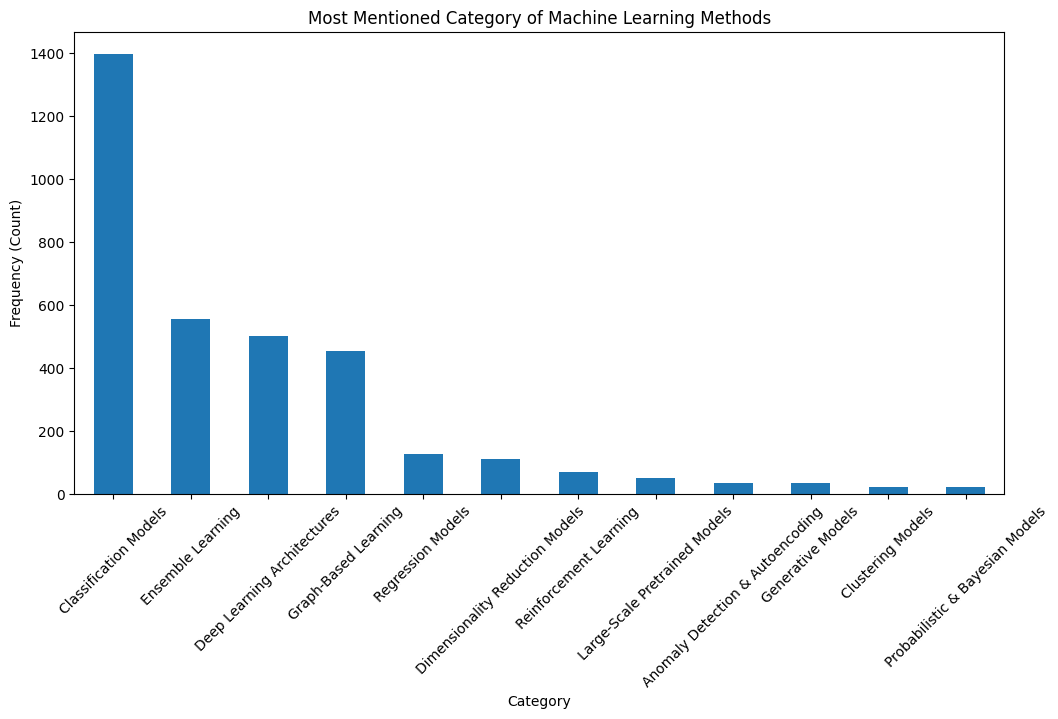

In [22]:
import matplotlib.pyplot as plt

# Aggregate the counts of ML terms
ml_term_counts = ml_results_df.groupby("Category")["cnt"].sum().sort_values(ascending=False)

# Plot the top ML methods
plt.figure(figsize=(12, 6))
ml_term_counts.head(20).plot(kind="bar")
plt.title("Most Mentioned Category of Machine Learning Methods")
plt.xlabel("Category")
plt.ylabel("Frequency (Count)")
plt.xticks(rotation=45)
plt.show()

Trend analysis

<Figure size 1200x600 with 0 Axes>

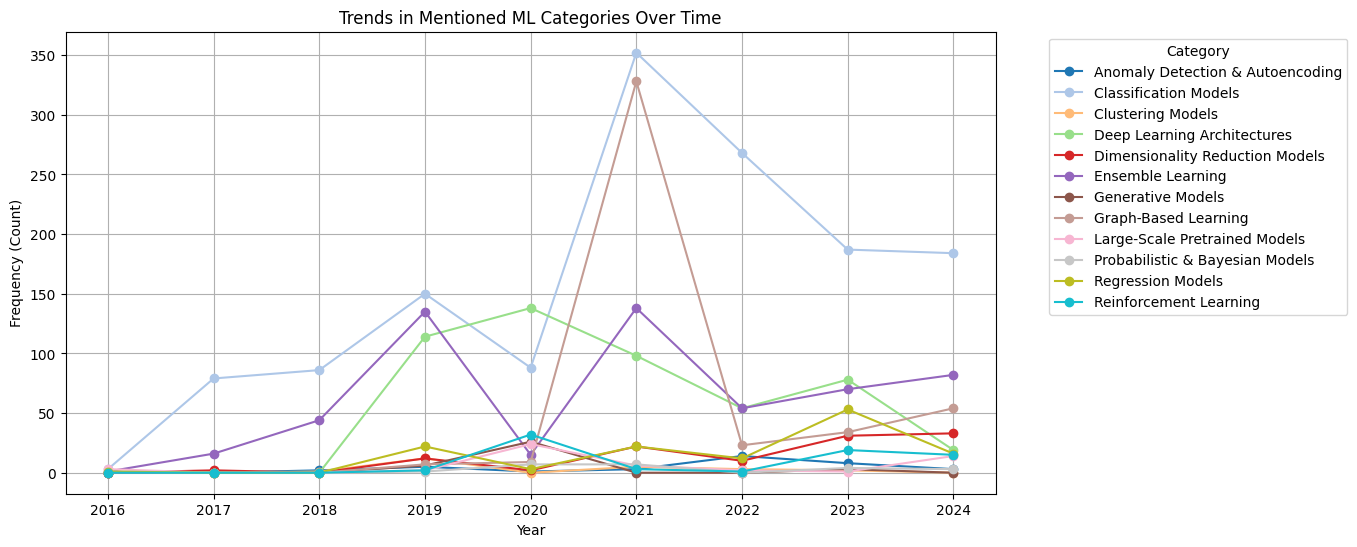

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Merge ML results with publication years
ml_trend_df = ml_results_df.merge(meta_df, on="title")

# Aggregate counts per year
ml_trend_over_time = ml_trend_df.groupby(["year", "Category"])["cnt"].sum().reset_index()

# Pivot for visualization
ml_trend_pivot = ml_trend_over_time.pivot(index="year", columns="Category", values="cnt").fillna(0)

# Define colormap using the correct method
num_categories = len(ml_trend_pivot.columns)
colormap = plt.get_cmap("tab20")  # Corrected method to get the colormap
colors = [colormap(i / num_categories) for i in range(num_categories)]  # Generate distinct colors

# Plot time-series trends with improved colors
plt.figure(figsize=(12, 6))
ax = ml_trend_pivot.plot(kind="line", figsize=(12, 6), marker="o", color=colors)

plt.title("Trends in Mentioned ML Categories Over Time")
plt.xlabel("Year")
plt.ylabel("Frequency (Count)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()


Co-occurrence Analysis – Generate a network graph to explore relationships between ML Categories and research topics.

In [24]:
from collections import Counter
import numpy as np

# Group categories by title
grouped_categories = ml_trend_df.groupby('title')['Category'].apply(list)

# Get unique categories
unique_categories = sorted(ml_trend_df['Category'].unique())

# Create an empty co-occurrence matrix
co_occurrence_matrix_category = pd.DataFrame(
    np.zeros((len(unique_categories), len(unique_categories)), dtype=int),
    index=unique_categories,
    columns=unique_categories
)

# Populate the matrix
for categories in grouped_categories:
    category_counts = Counter(categories)
    for cat1 in category_counts:
        for cat2 in category_counts:
            if cat1 != cat2:
                co_occurrence_matrix_category.loc[cat1, cat2] += 1

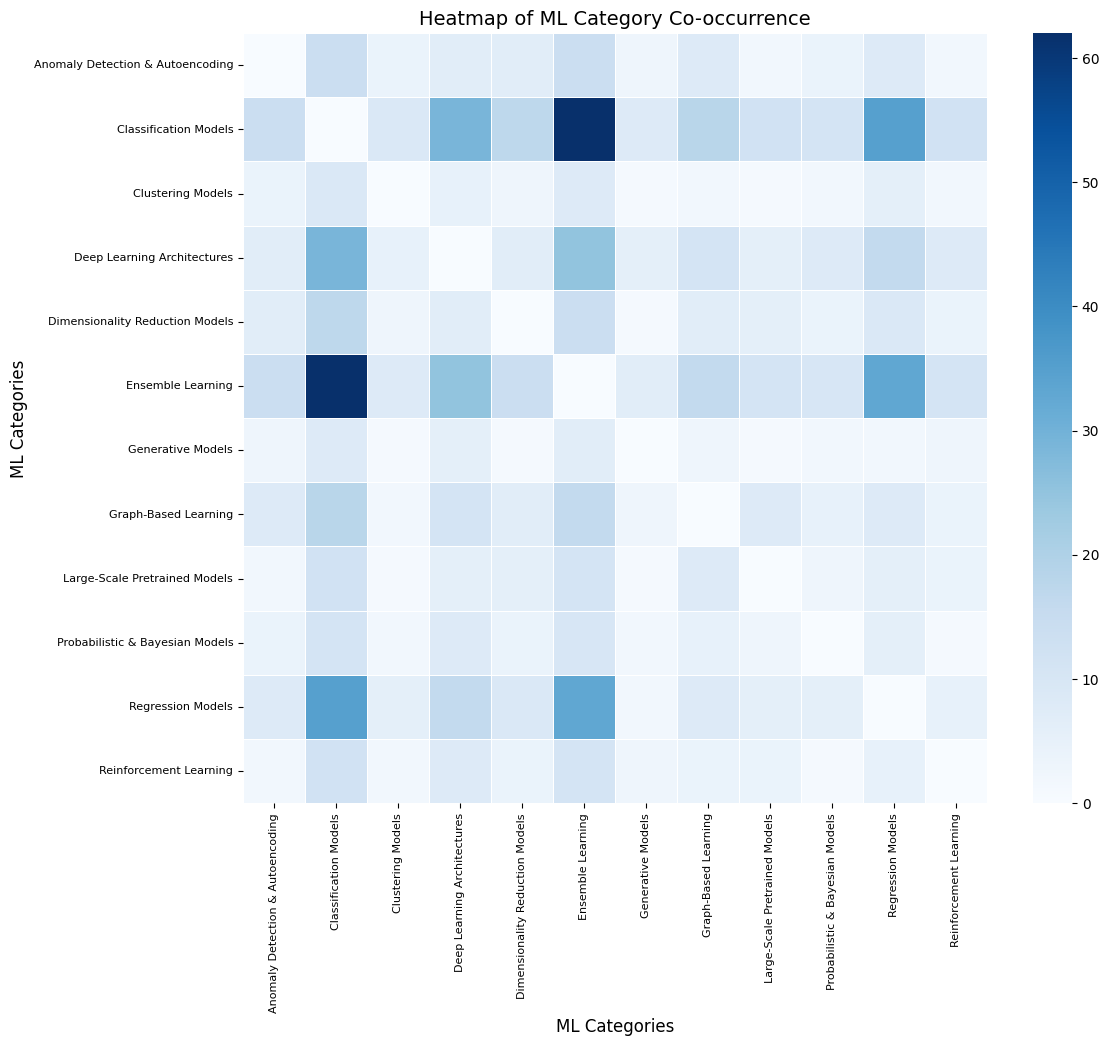

In [25]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 10))

# Use seaborn's heatmap to visualize the co-occurrence matrix
sns.heatmap(co_occurrence_matrix_category, cmap="Blues", annot=False, linewidths=0.5)

# Labels and title
plt.title("Heatmap of ML Category Co-occurrence", fontsize=14)
plt.xlabel("ML Categories", fontsize=12)
plt.ylabel("ML Categories", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

In [26]:
co_occurrence_matrix_category

,Anomaly Detection & Autoencoding,Classification Models,Clustering Models,Deep Learning Architectures,Dimensionality Reduction Models,Ensemble Learning,Generative Models,Graph-Based Learning,Large-Scale Pretrained Models,Probabilistic & Bayesian Models,Regression Models,Reinforcement Learning
Anomaly Detection & Autoencoding,0,14,4,7,7,14,3,8,2,4,8,2
Classification Models,14,0,9,29,17,62,8,18,12,11,35,12
Clustering Models,4,9,0,5,3,8,1,2,1,2,6,2
Deep Learning Architectures,7,29,5,0,7,25,6,11,6,8,16,8
Dimensionality Reduction Models,7,17,3,7,0,14,1,7,6,4,9,4
Ensemble Learning,14,62,8,25,14,0,7,16,11,10,33,11
Generative Models,3,8,1,6,1,7,0,3,1,2,2,3
Graph-Based Learning,8,18,2,11,7,16,3,0,8,5,8,4
Large-Scale Pretrained Models,2,12,1,6,6,11,1,8,0,3,6,4
Probabilistic & Bayesian Models,4,11,2,8,4,10,2,5,3,0,6,1


Perform GAP analysis on this data

In [27]:
# Identify low co-occurrence category pairs (potential gaps)
low_threshold = 2  # Define threshold for underexplored category pairs
underexplored_category_pairs = np.where(
    (co_occurrence_matrix_category > 0) & (co_occurrence_matrix_category <= low_threshold)
)

# Create a DataFrame with underexplored category pairs
underexplored_category_df = pd.DataFrame({
    "Category 1": [unique_categories[i] for i in underexplored_category_pairs[0]],
    "Category 2": [unique_categories[j] for j in underexplored_category_pairs[1]],
    "Co-occurrence Frequency": [co_occurrence_matrix_category.iloc[i, j] for i, j in zip(underexplored_category_pairs[0], underexplored_category_pairs[1])]
})

# Display the underexplored co-occurrences
# tools.display_dataframe_to_user(name="Underexplored ML Category Pairs", dataframe=underexplored_category_df)
underexplored_category_df

,Category 1,Category 2,Co-occurrence Frequency
0,Anomaly Detection & Autoencoding,Large-Scale Pretrained Models,2
1,Anomaly Detection & Autoencoding,Reinforcement Learning,2
2,Clustering Models,Generative Models,1
3,Clustering Models,Graph-Based Learning,2
4,Clustering Models,Large-Scale Pretrained Models,1
5,Clustering Models,Probabilistic & Bayesian Models,2
6,Clustering Models,Reinforcement Learning,2
7,Dimensionality Reduction Models,Generative Models,1
8,Generative Models,Clustering Models,1
9,Generative Models,Dimensionality Reduction Models,1


Identified underexplored category pairs in ML research, where different categories have co-occurred only once or twice in the dataset. These might represent niche or less commonly explored combinations, offering potential research opportunities.